# Cálculo Variacional de Estado Fundamental Hidrógeno 

In [1]:
from numpy import  linspace, zeros, array, pi
from scipy.linalg import  eigh , eigvalsh

%matplotlib inline
from matplotlib.pyplot import plot, title, legend, show, axhline, \
                              xlabel, ylabel, axis, figure

In [2]:
nsize = 4
S = zeros((nsize,nsize))
H = zeros((nsize,nsize))
Alpha = zeros((nsize))
Ci = zeros((nsize))

In [3]:
# Datos Iniciales para variacional
Alpha[0] = 13.00773
Alpha[1] = 1.962079
Alpha[2] = 0.444529
Alpha[3] = 0.1219492

In [4]:
# Cálculo de Overlaps  Sij=<xi|xj>

def overlap(Alpha,p,q):
    spq = ( pi / (Alpha[p] + Alpha[q]) )**(3./2.)
    
    return spq

for i in range(0,nsize):
    for j in range(i,nsize):        
        S[i,j]=overlap(Alpha,i,j)
        S[j,i]=S[i,j]

def gauss(Alpha, r):
    

In [5]:
S

array([[  4.19640644e-02,   9.61391815e-02,   1.12857904e-01,
          1.17042513e-01],
       [  9.61391815e-02,   7.16316708e-01,   1.49147774e+00,
          1.85084232e+00],
       [  1.12857904e-01,   1.49147774e+00,   6.64247101e+00,
          1.30602054e+01],
       [  1.17042513e-01,   1.85084232e+00,   1.30602054e+01,
          4.62286682e+01]])

In [6]:
 # Cálculo de Hamiltoniano Hij=<xi| H |xj>


# Cálculo de Energía Cinética  Tij=<xi|-1/2 D^2 |xj>
def Tkin(Alpha,p,q):
    rnum = 3 * pi**(3./2.) * Alpha[p] * Alpha[q]
    rden =  (Alpha[p] + Alpha[q] )**(5./2.)    
    Tpq = rnum/rden    
    return Tpq


# Cálculo de Energía Potencial  Vij=<xi|-Z/r |xj>
def Vpot(Alpha,p,q):
    Vpq =  ( -2*pi )  /  (Alpha[p] + Alpha[q])    
    return Vpq

for i in range(0,nsize):
    for j in range(i,nsize): 
        H[i,j]=Tkin(Alpha,i,j) + Vpot(Alpha,i,j)
        H[j,i]=H[i,j]
   

In [7]:
H

array([[  0.57726847,   0.07200247,  -0.3215405 ,  -0.43612626],
       [  0.07200247,   0.50704993,  -0.98918483,  -2.37741992],
       [ -0.3215405 ,  -0.98918483,  -2.63808243,  -7.34221693],
       [ -0.43612626,  -2.37741992,  -7.34221693, -17.30516271]])

In [8]:
# Solución generalized eigenvalues (H-ES)(C)=0
# Sólo Autovalores !

Ener = eigvalsh(H,S,type=1)
Ener

array([ -0.49927841,   0.11321392,   2.59229957,  21.14436519])

In [9]:
Ener[0]

-0.49927840566748544

In [10]:
# Solución generalized eigenvalues (H-ES)(C)=0

Ener,coef = eigh(H,S,type=1)
Ci = coef[:,0]

In [11]:
def psi(Ci,Alpha,x):
    from math import  exp
    nsize = len(Ci) 
    sum = 0.0
    for i in range(0,nsize):
        sum = sum + Ci[i]*exp(-Alpha[i]*x**2)
    return sum

In [12]:
# array definitions
npts = 100
xmin = 0.0
xmax = 4.0
x = linspace(xmin,xmax,npts)
wave1s = zeros(npts)

In [13]:
for i in range(0,npts):
        wave1s[i] = psi(-Ci,Alpha,x[i])


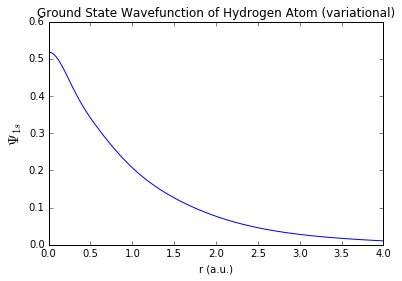

In [14]:

plot(x,wave1s);
axis([xmin,xmax,0,0.6]);
title("Ground State Wavefunction of Hydrogen Atom (variational)");
xlabel("r (a.u.)");
ylabel("$\Psi_{1s}$",size=15);